# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [31]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [32]:
cities

['cape town',
 'avarua',
 'tsihombe',
 'albany',
 'dingle',
 'chuy',
 'rikitea',
 'hobart',
 'vaini',
 'bayanday',
 'pisco',
 'east london',
 'kaitangata',
 'hithadhoo',
 'mabaruma',
 'kapustin yar',
 'ishigaki',
 'talnakh',
 'pangnirtung',
 'illoqqortoormiut',
 'conceicao do araguaia',
 'ancud',
 'hermanus',
 'punta arenas',
 'arraial do cabo',
 'zemio',
 'cidreira',
 'rungata',
 'poum',
 'teeli',
 'namibe',
 'tucurui',
 'grahamstown',
 'comodoro rivadavia',
 'bendigo',
 'palabuhanratu',
 'new norfolk',
 'narsaq',
 'zhigansk',
 'rio tuba',
 'skagen',
 'carnarvon',
 'tuktoyaktuk',
 'busselton',
 'meyungs',
 'mataura',
 'aklavik',
 'cavalcante',
 'leua',
 'longyearbyen',
 'yellowknife',
 'ushuaia',
 'lorengau',
 'manzhouli',
 'saskylakh',
 'puerto ayora',
 'pulandian',
 'acarau',
 'klyuchi',
 'guaraniacu',
 'pevek',
 'chastyye',
 'ondjiva',
 'thompson',
 'dilla',
 'bluff',
 'kapaa',
 'cabo san lucas',
 'guerrero negro',
 'bethel',
 'plon',
 'cabrera',
 'belushya guba',
 'taolanaro',
 'b

In [33]:
# Build query

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

query_url = f"{url}appid={api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=7b255e58cd0f09be527f3189f7936c48&units=metric&q='

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [45]:
# Set up lists from weather
country = []
date = []
temp = []
humid = []
clouds = []
wind = []
lat = []
lon = []
city_yes = []

key = 'message'
notfound = 0
found = 0
onlyfound = 0
for city in cities:
   #print(city)
   response = requests.get(query_url + city).json()
   #print(response)
   if key in response:
       onlyfound+=1
       if response[key] == 'city not found':
           print(city, "Error")
           notfound+=1
   else:
    city_yes.append(city)
    temp.append(response['main']['temp'])
    humid.append(response['main']['humidity'])
    clouds.append(response['clouds']['all'])
    wind.append(response['wind']['speed'])
    country.append(response['sys']['country'])
    lat.append(response['coord']['lat'])
    lon.append(response['coord']['lon'])
    found+=1

print(len(cities),  onlyfound, notfound, found)

tsihombe Error
illoqqortoormiut Error
rungata Error
palabuhanratu Error
meyungs Error
acarau Error
belushya guba Error
taolanaro Error
asfi Error
asau Error
akyab Error
mys shmidta Error
malwan Error
svetlyy Error
abu jubayhah Error
saleaula Error
sumbawa Error
barentsburg Error
sorvag Error
mazulskiy Error
sentyabrskiy Error
ust-kamchatsk Error
bengkulu Error
wulanhaote Error
banmo Error
nizhneyansk Error
mme Error
samusu Error
karaul Error
amderma Error
warqla Error
kota bahru Error
grand river south east Error
kazalinsk Error
artyk Error
attawapiskat Error
qui nhon Error
tabiauea Error
gulshat Error
cockburn harbour Error
bargal Error
urumqi Error
zhanatas Error
sakakah Error
temaraia Error
vaitupu Error
lolua Error
tungkang Error
olafsvik Error
bacuit Error
cumaribo Error
marcona Error
tawnat Error
nylstroom Error
louisbourg Error
buariki Error
padre bernardo Error
zhuozhou Error
kachikau Error
tuggurt Error
yomitan Error
mutsamudu Error
jibuti Error
kamenskoye Error
kemijarvi Erro

In [42]:
print(len(country),len(temp),len(humid),len(clouds),len(wind),len(lat),len(lon),len(city_yes))

0 555 555 555 555 555 555 555


In [48]:
city_weather_dict = {
    "City": city_yes,
    "Country": country,
    "Lat": lat,
    "Long": lon,
    "Humidity": humid,
    "Temperature": temp,
    "Cloudiness": clouds,
    "Wind Speed": wind
    }
city_weather = pd.DataFrame(city_weather_dict)
city_weather.head()

,City,Country,Lat,Long,Humidity,Temperature,Cloudiness,Wind Speed
0,cape town,ZA,-33.93,18.42,93,11.75,40,1.50
1,avarua,CK,-21.21,-159.78,64,23.00,18,8.20
2,albany,US,42.65,-73.75,61,23.16,20,1.68
3,dingle,PH,11.00,122.67,78,27.07,97,2.29
4,chuy,UY,-33.69,-53.46,72,6.97,20,7.78


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

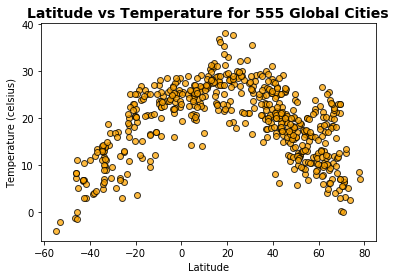

In [53]:
# Scatterplot of Latitiude vs Temperature

x_axis = city_weather['Lat']
y_axis = city_weather['Temperature']

# Build the scatter plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="orange", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties

plt.title("Latitude vs Temperature for 555 Global Cities", fontsize=14, fontweight="bold")
plt.xlabel("Latitude")
plt.ylabel("Temperature (celsius)")
#plt.legend(loc="upper right")

# Save Figure
plt.savefig("lat_temp_scatter.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

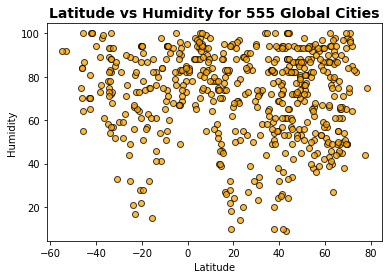

In [54]:
# Scatterplot of Latitiude vs Humidity

x_axis = city_weather['Lat']
y_axis = city_weather['Humidity']

# Build the scatter plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="orange", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties

plt.title("Latitude vs Humidity for 555 Global Cities", fontsize=14, fontweight="bold")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
#plt.legend(loc="upper right")

# Save Figure
plt.savefig("lat_humid_scatter.png")

# Show plot
plt.show()

In [57]:
city_weather['Humidity'].mean()

71.61981981981982

#### Latitude vs. Cloudiness Plot

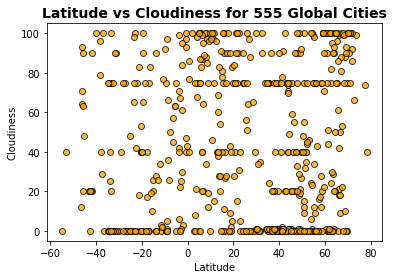

In [55]:
# Scatterplot of Latitiude vs Temperature

x_axis = city_weather['Lat']
y_axis = city_weather['Cloudiness']

# Build the scatter plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="orange", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties

plt.title("Latitude vs Cloudiness for 555 Global Cities", fontsize=14, fontweight="bold")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
#plt.legend(loc="upper right")

# Save Figure
plt.savefig("lat_clouds_scatter.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

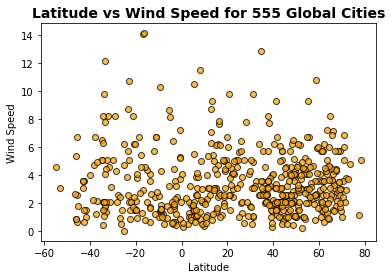

In [56]:
# Scatterplot of Latitiude vs Wind Speed

x_axis = city_weather['Lat']
y_axis = city_weather['Wind Speed']

# Build the scatter plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="orange", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties

plt.title("Latitude vs Wind Speed for 555 Global Cities", fontsize=14, fontweight="bold")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
#plt.legend(loc="upper right")

# Save Figure
plt.savefig("lat_wind_scatter.png")

# Show plot
plt.show()

In [58]:
city_weather['Wind Speed'].mean()

3.3512972972972896

In [ ]:
#CONCLUSIONS

# Temperature varies with latitude. This is expected as latitude is a relative measure 
# of distance from the equator, the further from the equator a city is, the temperature
# decreases. 

# Humidty. Average humidity is about 71%, with the majority of sampled cities enjoying 
#a humidty level greater than 60%

# Wind speed. The average wind speed of sampled cities is less than 4 miles per hour. 
# The majority of cities enjoy a wind speed of less than 6 miles per hour. 

# Less cities are windy and dry compared to the average sample ctiy. 
# Cities appear to be equally cloud